<img align = 'center' src="./Images/ML_SWE.jpg" alt = 'image' width = '1000'/>

# Long Short Term Memory

**Savalan Neisary - The Univeristy of Alabama**

* I'm a second-year Ph.D. student, and I'm a data science and ML nerd trying to use it in hydrological modeling and hydrological drought and streamflow predictions. 

* My goal for participating in this hackweek is to learn how to implement ML/DL methods in snow-water equivalent modeling and what kind of inputs I should use with these models. 

* We implemented LSTM and 1D-CNN algorithms during the past few days, and the results showed that CNN has better results than LSTM.


In [ ]:
import os
import DataProcess
import lstm_model as bls

In [2]:
cwd = '/home/jovyan/Snow-Extrapolation/contributors/lstm'
datapath = '/home/jovyan/Snow-Extrapolation'

In [3]:
#Define hold out year
HOY = 2019
#Run data processing script to partition key regional dataframes
#note, need to load RegionTrain_SCA.h5,
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, datapath, cwd)

Processing training dataframes for each region
N_Sierras
S_Sierras_Low
S_Sierras_High


In [4]:
#Get regions
Regions = list(RegionTrain.keys())
Predictions = {} 
for Region in Regions:
    epochs= 3
    model = bls.Model_train(cwd, epochs, RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, Region)
    
    Predictions[Region] = bls.Model_predict(cwd,  RegionTest, RegionObs_Test, RegionTest_notScaled, Region, model)
    
    
    

Training model for:  N_Sierras
All previous files deleted successfully.
(750, 1, 105)


2023-10-27 16:30:31.425910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-27 16:30:31.425940: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-27 16:30:31.425956: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-savalann): /proc/driver/nvidia/version does not exist
2023-10-27 16:30:31.426171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 2ms/step
Training model for:  S_Sierras_Low
All previous files deleted successfully.
(838, 1, 6)
9/9 [==============================] - 0s 2ms/step
Training model for:  S_Sierras_High
All previous files deleted successfully.
(1632, 1, 40)
18/18 [==============================] - 0s 2ms/step


Preliminary Model Analysis for:  N_Sierras
 R2 is  0.8818803581876463
 RMSE is  12.519587994473245
 R2 fSCA is  0.8680501928438771
 RMSE fSCA is  13.232239601328738


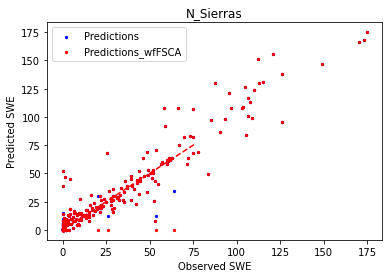

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9705541443854142
 RMSE is  4.32987846411536
 R2 fSCA is  0.8625998336277363
 RMSE fSCA is  9.35313593881066


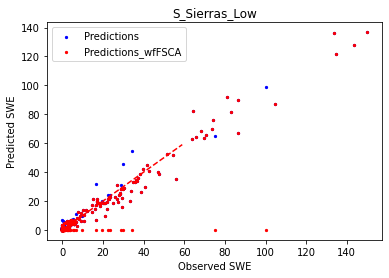

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.9713849145167294
 RMSE is  7.935326703534399
 R2 fSCA is  0.9596244719838916
 RMSE fSCA is  9.42597742586483


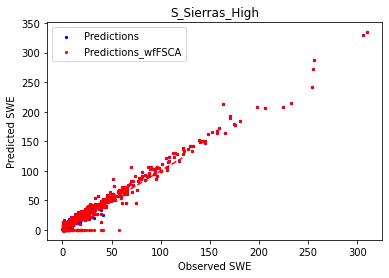

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA
0,N_Sierras,0.88,12.52,0.87,13.23
1,S_Sierras_Low,0.97,4.33,0.86,9.35
2,S_Sierras_High,0.97,7.94,0.96,9.43


In [5]:
Performance = bls.Prelim_Eval(cwd, Predictions)
Performance